# Determining Ankle Stress - Finding Peaks and their Widths

The goal of this notebook is to prototype the way we determine when a user stresses their ankle.

Ankle stress is defined as rotating an ankle more than X % of a user's normal Range of Motion.

In [7]:
import numpy as np                    
import matplotlib.pyplot as plt 

from scipy import signal, interpolate


In [28]:
THRESHOLD_INVERT = 45 * 0.6
THRESHOLD_EVERT  = -20 * 0.6

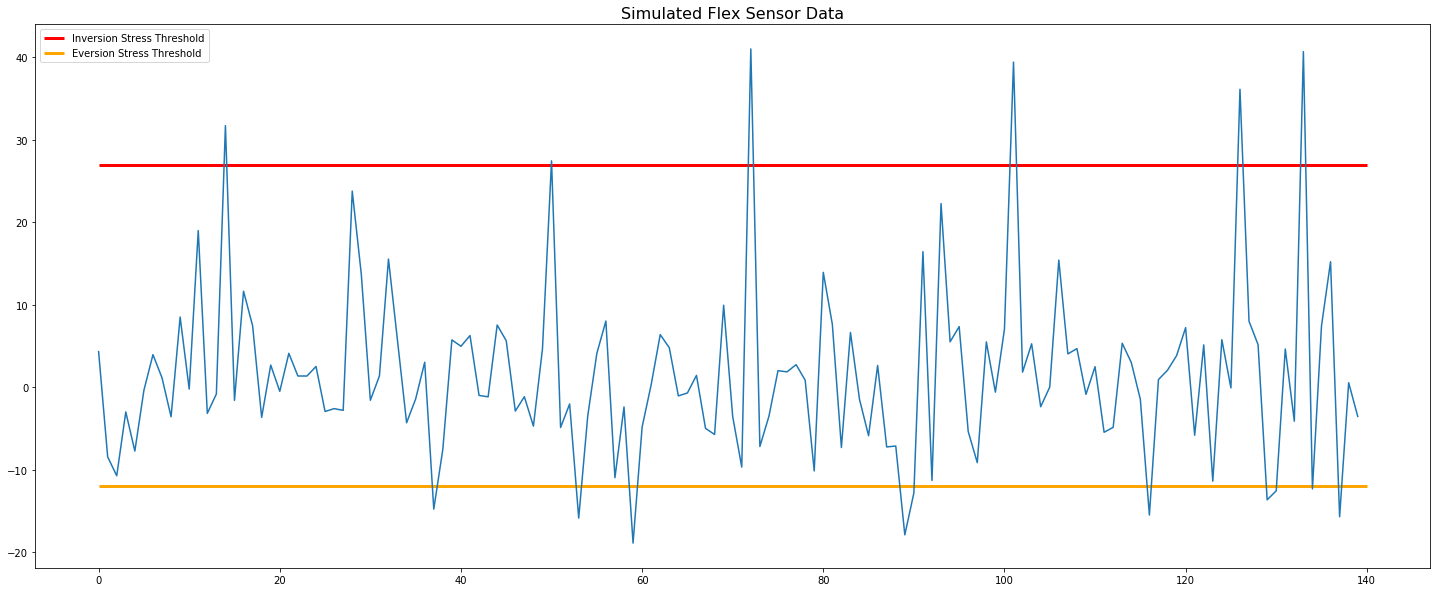

In [39]:
ankle_move = np.random.uniform(-20, 45, 40)
ankle_stable = np.random.uniform(0,0,100)

data      = np.concatenate((ankle_move,ankle_stable))
np.random.shuffle(data)

time = np.linspace(0, 100, 140)
a_BSpline = interpolate.make_interp_spline(time, data)
data = a_BSpline(time)

noise = np.random.normal(0,5,140)
data = data + noise

x = np.arange(0,140)

invert = np.array([THRESHOLD_INVERT] * 140)
evert  = np.array([THRESHOLD_EVERT]  * 140)


plt.figure(figsize = (25,10))

idx = np.argwhere(np.diff(np.sign(data - invert))).flatten()
# plt.plot(x[idx], data[idx], 'ro')


plt.title("Simulated Flex Sensor Data", size = 16)
plt.hlines(THRESHOLD_INVERT, 0, 140, color = 'r', linewidth = 3, label = "Inversion Stress Threshold")
plt.hlines(THRESHOLD_EVERT , 0, 140, color = 'orange', linewidth = 3, label = "Eversion Stress Threshold")
plt.legend()
plt.plot(data)